In [1]:
import raster
import wireframe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import transformation
import camera_persp.camera as cam

In [2]:
def extract_polygon(edges):
    poly = []
    verts = []
    counter = 0
    for vec3d in edges:
        p1 = vec3d[0]
        verts.append(p1)
        counter += 1

        if counter == edges.sep():
            poly.append(verts)
            verts = []
            counter = 0
    return poly

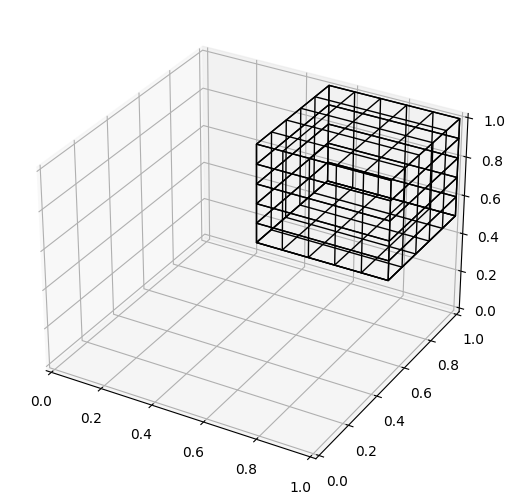

In [3]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
# edges = transformation.translate_edges(edges, (-.2, -.2, -.2))

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

(1.1408563820557884, 0.20116376126988017, -0.17364817766693033)


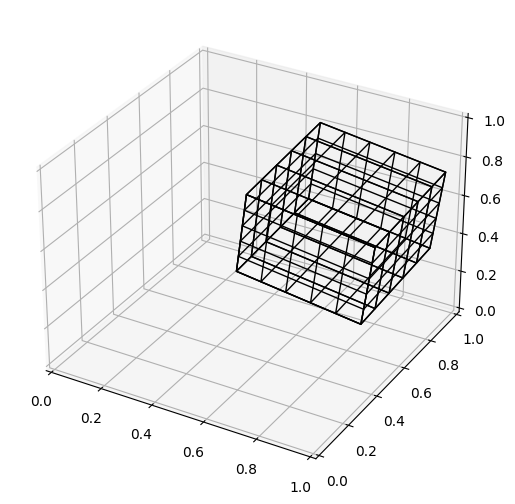

In [4]:
# Setup Camera
at = (0, 0, 0)
eye = (1, 0, 1)

eye = transformation.rotate(eye, (0, 10, 10))
print(eye)

camera = cam.get_camera(at, eye)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = wireframe.cube(.5, res=.5)
# edges = transformation.translate_edges(edges, (-.2, -.2, -.2))
edges = cam.edges_to_camera(edges, camera, eye)

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

[((0.5, 0.5, 0.5), (1.0, 0.5, 0.5)), ((1.0, 0.5, 0.5), (1.0, 1.0, 0.5)), ((1.0, 1.0, 0.5), (0.5, 1.0, 0.5)), ((0.5, 1.0, 0.5), (0.5, 0.5, 0.5)), ((0.5, 0.5, 1.0), (1.0, 0.5, 1.0)), ((1.0, 0.5, 1.0), (1.0, 1.0, 1.0)), ((1.0, 1.0, 1.0), (0.5, 1.0, 1.0)), ((0.5, 1.0, 1.0), (0.5, 0.5, 1.0)), ((0.5, 0.5, 0.5), (0.5, 0.5, 1.0)), ((1.0, 0.5, 0.5), (1.0, 0.5, 1.0)), ((1.0, 1.0, 0.5), (1.0, 1.0, 1.0)), ((0.5, 1.0, 0.5), (0.5, 1.0, 1.0)), ((0.5, 0.5, 0.5), (1.0, 0.5, 0.5)), ((1.0, 0.5, 0.5), (1.0, 0.5, 1.0)), ((1.0, 0.5, 1.0), (0.5, 0.5, 1.0)), ((0.5, 0.5, 1.0), (0.5, 0.5, 0.5)), ((0.5, 1.0, 0.5), (1.0, 1.0, 0.5)), ((1.0, 1.0, 0.5), (1.0, 1.0, 1.0)), ((1.0, 1.0, 1.0), (0.5, 1.0, 1.0)), ((0.5, 1.0, 1.0), (0.5, 1.0, 0.5)), ((0.5, 0.5, 0.5), (0.5, 1.0, 0.5)), ((0.5, 1.0, 0.5), (0.5, 1.0, 1.0)), ((0.5, 1.0, 1.0), (0.5, 0.5, 1.0)), ((0.5, 0.5, 1.0), (0.5, 0.5, 0.5)), ((1.0, 0.5, 0.5), (1.0, 1.0, 0.5)), ((1.0, 1.0, 0.5), (1.0, 1.0, 1.0)), ((1.0, 1.0, 1.0), (1.0, 0.5, 1.0)), ((1.0, 0.5, 1.0), (1.0, 0.5

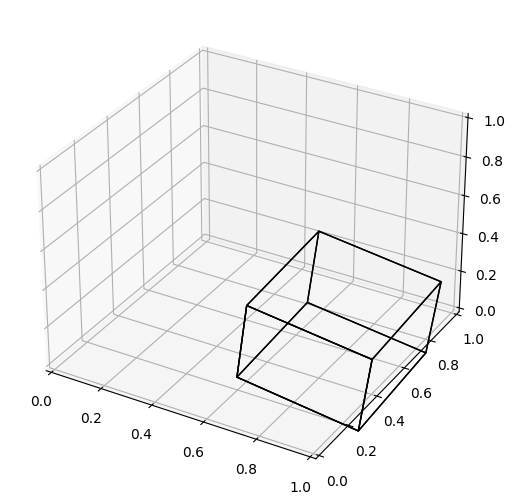

[((0.4206054885198679, 0.5695446336120019, 0.08699085443046864), (0.3357183636649619, 0.6447824005677634, -0.3999726498050931)), ((0.3357183636649619, 0.6447824005677634, -0.3999726498050931), (0.8282904247508688, 0.6447824005677634, -0.4858374542221636)), ((0.8282904247508688, 0.6447824005677634, -0.4858374542221636), (0.9131775496057747, 0.5695446336120019, 0.0011260500133982276)), ((0.9131775496057747, 0.5695446336120019, 0.0011260500133982276), (0.4206054885198679, 0.5695446336120019, 0.08699085443046864)), ((0.433526040808735, 1.0638515002682425, 0.16111089831226968), (0.348638915953829, 1.1390892672240038, -0.32585260592329207)), ((0.348638915953829, 1.1390892672240038, -0.32585260592329207), (0.8412109770397359, 1.1390892672240038, -0.4117174103403626)), ((0.8412109770397359, 1.1390892672240038, -0.4117174103403626), (0.9260981018946419, 1.0638515002682425, 0.07524609389519928)), ((0.9260981018946419, 1.0638515002682425, 0.07524609389519928), (0.433526040808735, 1.06385150026824

In [12]:
at = (0, 0, 0)
eye = (10, 0, 10)

eye = transformation.rotate(eye, (0, 10, 10))
camera = cam.get_camera(at, eye)

edges = wireframe.cube(.5, res=.1)


print(edges)
edges = transformation.scale_interval(edges, (0, 20)) # Camera is between 0 and 20
print(edges)
edges = cam.edges_to_camera(edges, camera, eye)
edges = transformation.scale_interval(edges, (0, 1), (0, 20))


fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()
edges

In [6]:
import camera_persp.persp as persp
from raster import *

In [7]:
# Setup Camera
at = (0, 0, 0)
eye = (10, 0, 10)

# eye = transformation.rotate(eye, (1, 1, 1))
print(eye)
camera = cam.get_camera(at, eye)

edges = wireframe.cube(.5, res=.1)

edges = transformation.scale_interval(edges, (0, 20)) # Camera is between 0 and 20
edges = cam.edges_to_camera(edges, camera, eye)
# edges = transformation.scale_interval(edges, (-1, 1), (0, 20)) # Camera is between 0 and 20

# Trans
# edges = transformation.rotate_edges(edges, (0, 0, 0))
# edges = transformation.translate_edges(edges, (0, 0, 0))
# edges = transformation.scale_edges(edges, (1, 1, 1))


(10, 0, 10)


Shape: 28 2


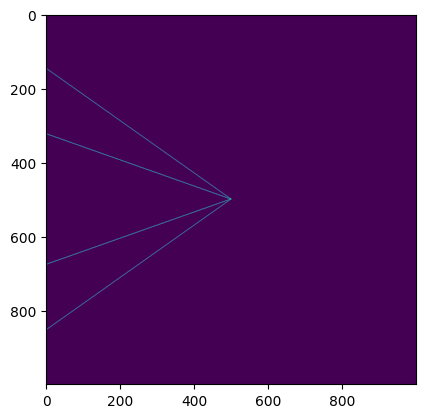

In [8]:
scale_x, scale_y = (1000, 1000)
scale = (scale_x, scale_y)

# edges = transformation.scale_interval(edges, (-1, 1)) # World is between -1 and 1
new_edges = persp.perspective_edges(edges, eye, scale)
print("Shape:", len(new_edges), len(new_edges[0]))

mx = [[0 for _ in range(scale_x)] for _ in range(scale_y)]
pts = draw_edge_list(new_edges, scale)
insert_points(mx, pts)

plt.imshow(convert_img(mx))
plt.show()
